# Import functions from library #

In [1]:
import tda_plus_rf_based_model 
from tda_plus_rf_based_model import read_shapefiles
from tda_plus_rf_based_model import make_3d_polygons
from tda_plus_rf_based_model import get_ml_features
from tda_plus_rf_based_model import classify_inventory_tda
from tda_plus_rf_based_model import plot_geometric_results
import numpy as np

# Earthquake triggered inventories- Hokkaido, Iwata, Niigata
# Rainfall-induced inventories- Kumamoto, Fukuoka, Saka

# Read shapefiles

In [2]:
##################################################################################################################################
earth_hokkaido_shapefile = read_shapefiles("E:/Germany Visit/Landslide Datasets/Japan Inventory/Earthquake_hokkaido_polygons.shp")
earth_iwata_shapefile = read_shapefiles("E:/Germany Visit/Landslide Datasets/Japan Inventory/Earthquake_iwata_polygons.shp")
earth_niigata_shapefile =read_shapefiles("E:/Germany Visit/Landslide Datasets/Japan Inventory/Earthquake_niigata_polygons.shp")
##################################################################################################################################
rain_kumamoto_shapefile = read_shapefiles("E:/Germany Visit/Landslide Datasets/Japan Inventory/Rainfall_kumamoto_polygons.shp")
rain_fukuoka_shapefile = read_shapefiles("E:/Germany Visit/Landslide Datasets/Japan Inventory/Rainfall_fukuoka_polygons.shp")
rain_saka_shapefile = read_shapefiles("E:/Germany Visit/Landslide Datasets/Japan Inventory/Rainfall_saka_polygons.shp")
##################################################################################################################################

In [3]:
dem_location="E:/dem_japan/"
inventory_name_list=['hokkaido.tif','iwata.tif','niigata.tif','kumamoto.tif','fukuoka.tif','saka.tif']

# Using package to get 3d point cloud data
** if users have DEM file use last input variable of make_3d_polygons ==1 otherwise 2

In [4]:
pointcloud_earth_hokkaido=make_3d_polygons(earth_hokkaido_shapefile,dem_location,inventory_name_list[0],1)
pointcloud_earth_iwata=make_3d_polygons(earth_iwata_shapefile,dem_location,inventory_name_list[1],1)
pointcloud_earth_niigata=make_3d_polygons(earth_niigata_shapefile,dem_location,inventory_name_list[2],1)
###########################################################################################################
pointcloud_rain_kumamoto=make_3d_polygons(rain_kumamoto_shapefile,dem_location,inventory_name_list[3],1)
pointcloud_rain_fukuoka=make_3d_polygons(rain_fukuoka_shapefile,dem_location,inventory_name_list[4],1)
pointcloud_rain_saka=make_3d_polygons(rain_saka_shapefile,dem_location,inventory_name_list[5],1)

# Using package to get ML features from 3d point cloud data

In [5]:
features_earth_hokkaido=get_ml_features(pointcloud_earth_hokkaido)
features_earth_iwata=get_ml_features(pointcloud_earth_iwata)
features_earth_niigata=get_ml_features(pointcloud_earth_niigata)
#################################################################################################################
features_rain_kumamoto=get_ml_features(pointcloud_rain_kumamoto)
features_rain_fukuoka=get_ml_features(pointcloud_rain_fukuoka)
features_rain_saka=get_ml_features(pointcloud_rain_saka)

# Case 1: Hokkaido is testing inventory

Probability of inventory triggered by Earthquake:  84.21%
Probability of inventory triggered by Rainfall:  15.79%


C:\Users\kamal rana\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.



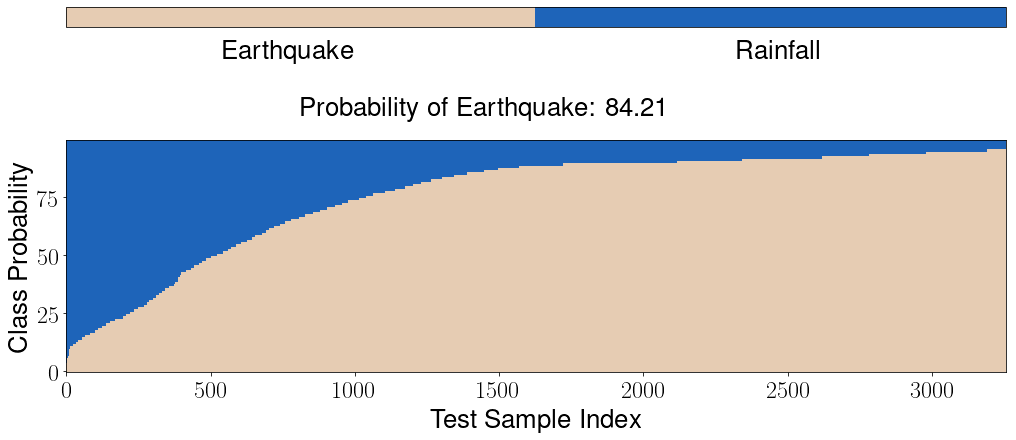

In [6]:
earthquake_inventory_features=np.vstack((features_earth_iwata,features_earth_niigata))
rainfall_inventory_features=np.vstack((features_rain_kumamoto,features_rain_fukuoka,features_rain_saka))
test_inventory_features=features_earth_hokkaido
predict_probability=classify_inventory_tda(earthquake_inventory_features,rainfall_inventory_features,test_inventory_features)
plot_geometric_results(predict_probability)

# Case 2: Iwata is testing inventory

Probability of inventory triggered by Earthquake:  94.25%
Probability of inventory triggered by Rainfall:  5.75%


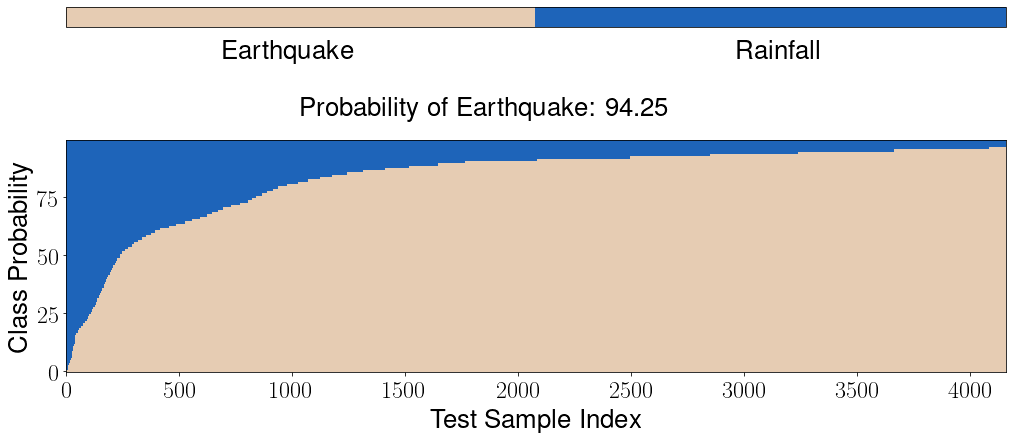

In [7]:
earthquake_inventory_features=np.vstack((features_earth_hokkaido,features_earth_niigata))
rainfall_inventory_features=np.vstack((features_rain_kumamoto,features_rain_fukuoka,features_rain_saka))
test_inventory_features=  features_earth_iwata
predict_probability_iwata=classify_inventory_tda(earthquake_inventory_features,rainfall_inventory_features,test_inventory_features)
plot_geometric_results(predict_probability_iwata)

# Case 3: Niigata is testing inventory

Probability of inventory triggered by Earthquake:  94.53%
Probability of inventory triggered by Rainfall:  5.47%


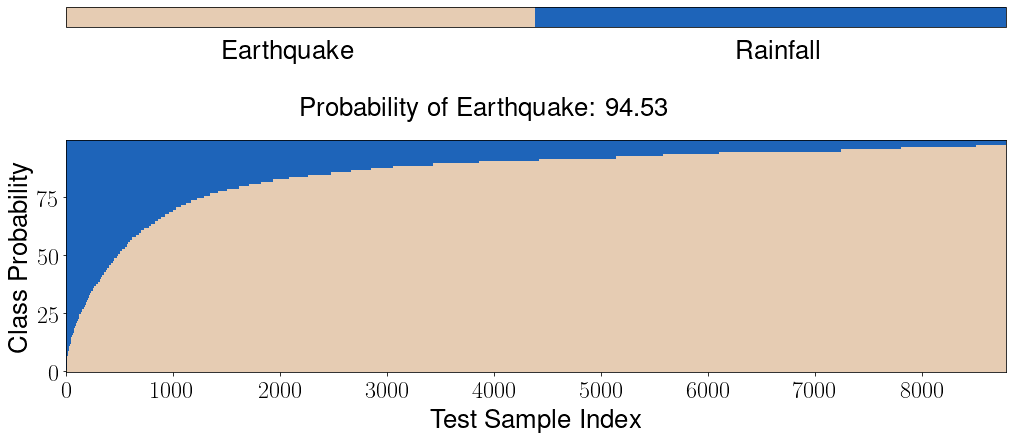

In [8]:
earthquake_inventory_features=np.vstack((features_earth_hokkaido,features_earth_iwata))
rainfall_inventory_features=np.vstack((features_rain_kumamoto,features_rain_fukuoka,features_rain_saka))
test_inventory_features=features_earth_niigata  
predict_probability_niigata=classify_inventory_tda(earthquake_inventory_features,rainfall_inventory_features,test_inventory_features)
plot_geometric_results(predict_probability_niigata)

# Case 4: Kumamoto is testing inventory

Probability of inventory triggered by Earthquake:  6.36%
Probability of inventory triggered by Rainfall:  93.64%


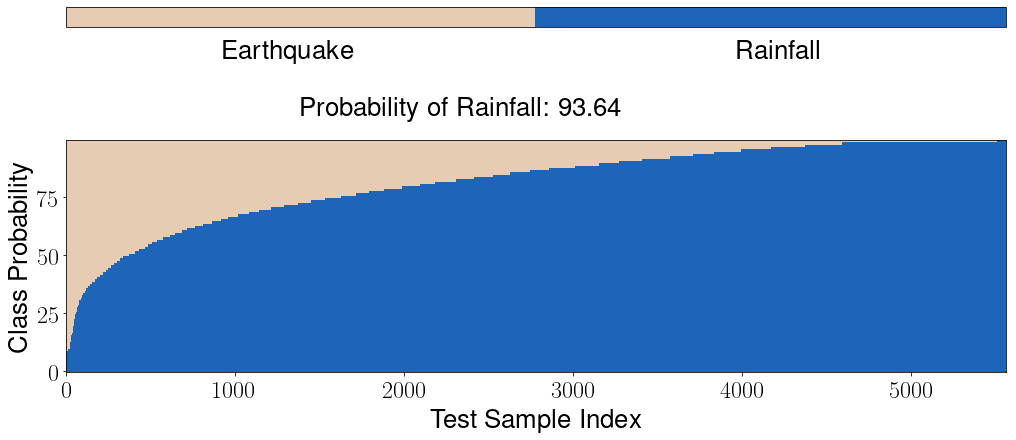

In [9]:
earthquake_inventory_features=np.vstack((features_earth_hokkaido,features_earth_iwata,features_earth_niigata))
rainfall_inventory_features=np.vstack((features_rain_fukuoka,features_rain_saka))
test_inventory_features=features_rain_kumamoto  
predict_probability_kumamoto=classify_inventory_tda(earthquake_inventory_features,rainfall_inventory_features,test_inventory_features)
plot_geometric_results(predict_probability_kumamoto)

# Case 5: Fukuoka is testing inventory

Probability of inventory triggered by Earthquake:  16.32%
Probability of inventory triggered by Rainfall:  83.68%


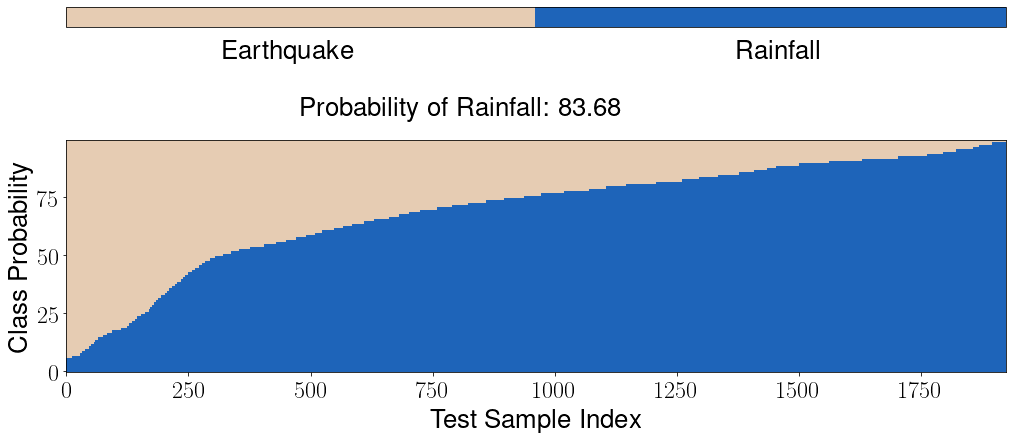

In [10]:
earthquake_inventory_features=np.vstack((features_earth_hokkaido,features_earth_iwata,features_earth_niigata))
rainfall_inventory_features=np.vstack((features_rain_kumamoto,features_rain_saka))
test_inventory_features=features_rain_fukuoka  
predict_probability_fukuoka=classify_inventory_tda(earthquake_inventory_features,rainfall_inventory_features,test_inventory_features)
plot_geometric_results(predict_probability_fukuoka)

# Case 6: Saka is testing inventory

Probability of inventory triggered by Earthquake:  2.13%
Probability of inventory triggered by Rainfall:  97.87%


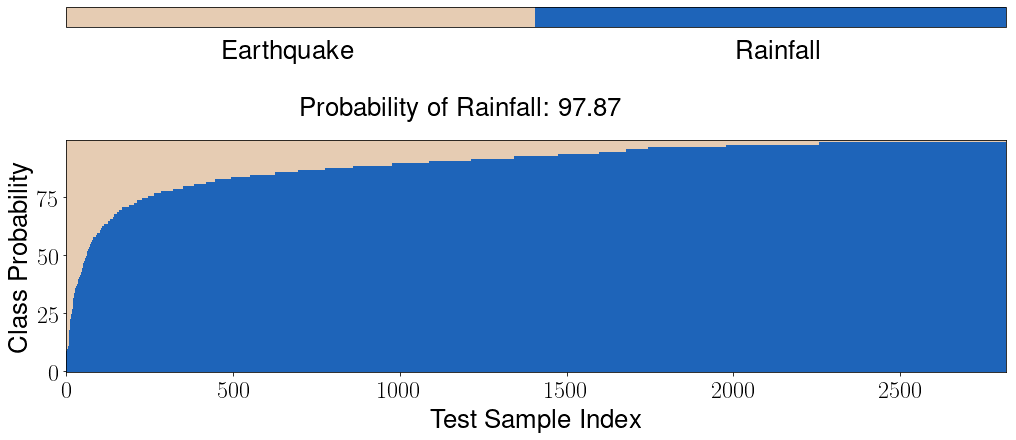

In [11]:
earthquake_inventory_features=np.vstack((features_earth_hokkaido,features_earth_iwata,features_earth_niigata))
rainfall_inventory_features=np.vstack((features_rain_kumamoto,features_rain_fukuoka))
test_inventory_features=features_rain_saka
predict_probability_saka=classify_inventory_tda(earthquake_inventory_features,rainfall_inventory_features,test_inventory_features)
plot_geometric_results(predict_probability_saka)